<a href="https://colab.research.google.com/github/rachel1234561/ds2002project/blob/main/analysis_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visualizations & Analysis**
### The first section uses college scorecard data, which is organized by institution and other variables.
### The second part uses American Community Survey data, which describes median earnings based on education.
###In the final section, the datasets are analyzed together.

### **College Scorecard(Institution-Level)**

In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotnine import *

In [ ]:
!git clone https://github.com/rachel1234561/ds2002project.git

Cloning into 'ds2002project'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 128.11 KiB | 1001.00 KiB/s, done.


In [2]:
#Read file into dataframe
data = pd.read_csv('college_data_clean.csv')
data=data.drop('degree_type',axis=1)
variables = data.columns.tolist()
variables

['id',
 'name',
 'zip',
 'city',
 'state',
 'acceptance_rate',
 'part_time',
 'debt',
 'pell_grant',
 'stud_fac_ratio',
 'percent_loans',
 'graduation_rate',
 'yearly_cost',
 'student_pop',
 'earnings',
 'school_type',
 'region',
 'average_act',
 'precent_female',
 'average_income']

In [3]:
#Make sure all numeric variables are type float or int
data['debt'] = pd.to_numeric(data['debt'], errors='coerce')
data['precent_female'] = pd.to_numeric(data['precent_female'], errors='coerce')
data['average_income'] = pd.to_numeric(data['average_income'], errors='coerce')
data['pell_grant'] = pd.to_numeric(data['pell_grant'], errors='coerce')
data['percent_loans'] = pd.to_numeric(data['percent_loans'], errors='coerce')

In [24]:
#Calculate descriptive stats
data.drop(['id','region'],axis=1).describe()

,acceptance_rate,part_time,debt,pell_grant,stud_fac_ratio,percent_loans,graduation_rate,yearly_cost,student_pop,earnings,average_act,precent_female,average_income
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,0.717484,0.100461,22761.260870,0.333373,13.451087,0.508555,0.604222,41583.395652,5657.089130,52851.789130,24.454348,0.577558,71462.595719
std,0.216348,0.099641,3697.293296,0.133075,3.947947,0.172664,0.168634,18658.341704,7855.280847,12732.627084,4.146145,0.104655,23821.067151
min,0.032400,0.000000,3591.000000,0.068900,5.000000,0.025600,0.040000,9380.000000,125.000000,23825.000000,14.000000,0.126126,21952.625348
25%,0.632550,0.025400,20500.000000,0.230825,11.000000,0.399500,0.482975,24722.250000,1235.750000,45055.250000,21.000000,0.526542,53413.962522
50%,0.765150,0.065850,23193.000000,0.325300,13.000000,0.502050,0.600500,39570.500000,2513.500000,50118.500000,24.000000,0.581005,67188.493094
75%,0.872400,0.144225,25642.750000,0.413550,16.000000,0.629325,0.721950,54210.500000,6594.500000,57631.000000,27.000000,0.633681,86128.405183
max,1.000000,0.610000,36500.000000,0.833200,54.000000,0.944100,0.978100,84126.000000,57874.000000,139346.000000,35.000000,0.979567,145228.221830


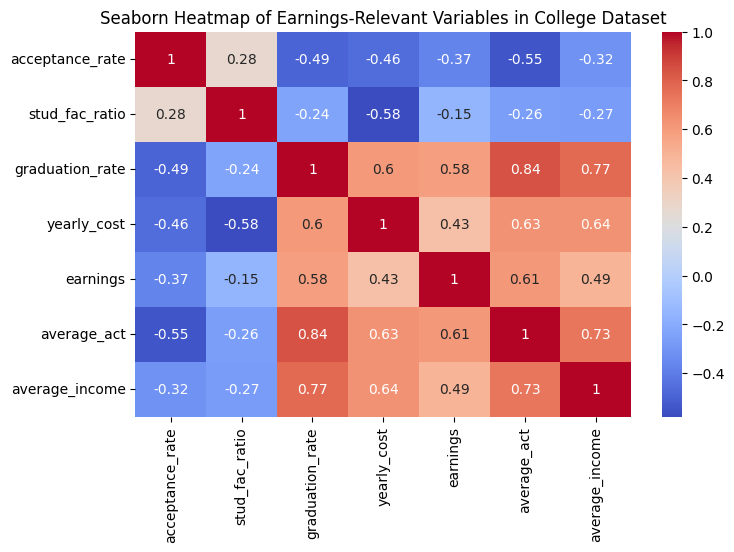

In [21]:
# Compute the correlation matrix using only numeric columns
numeric_vars = data.select_dtypes(include=['float64', 'int64']).drop(['region','id','part_time','pell_grant','precent_female','percent_loans','debt','student_pop'],axis='columns')
correlation_matrix = numeric_vars.corr()

# Create a heatmap to assess relationship between earnings and other factors
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Seaborn Heatmap of Earnings-Relevant Variables in College Dataset')
plt.show()

R= 0.35016672107437735


/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 292 rows containing missing values.


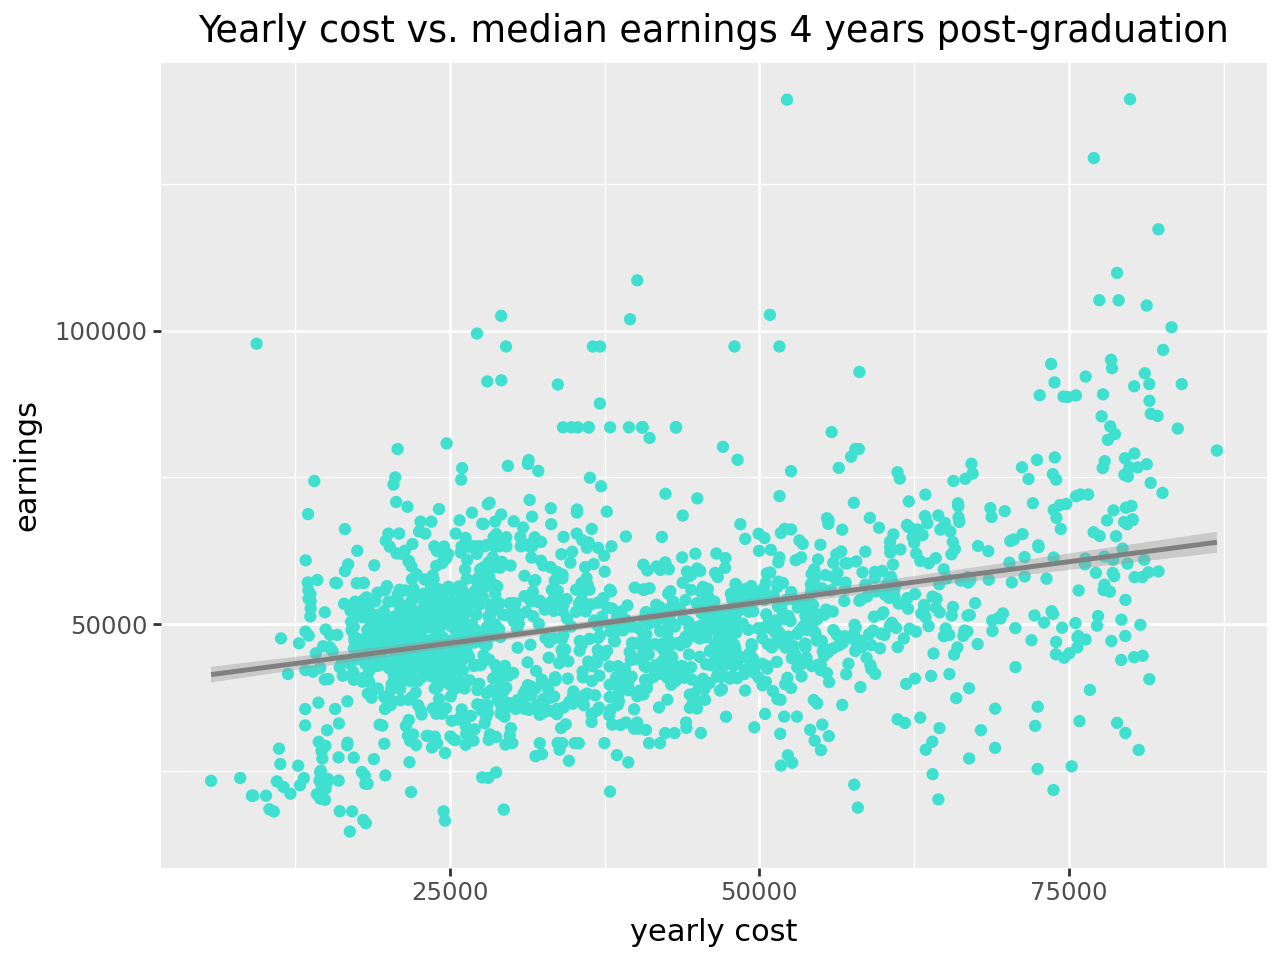

In [ ]:
# Create scatterplot to highlight relationship between post-graduation earnings and cost of college attendance.
r_1 = data['yearly_cost'].corr(data['earnings'])
print('R=',r_1)
ggplot(data,aes(x='yearly_cost',y='earnings'))+geom_point(color='turquoise')+geom_smooth(color='gray')+labs(title='Yearly cost vs. median earnings 4 years post-graduation',x='yearly cost')

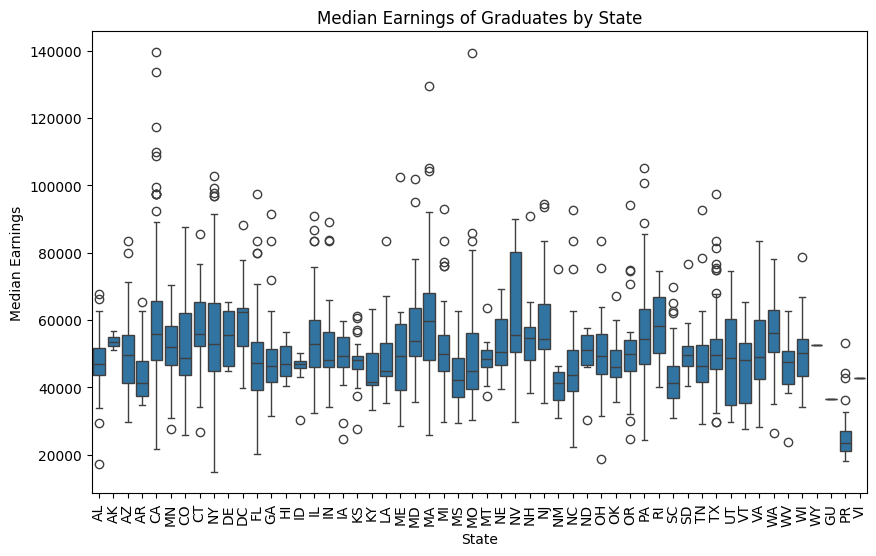

In [ ]:
# Create a box plot to compare median graduate earnings by state
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='earnings', data=data)
plt.title('Median Earnings of Graduates by State')
plt.xlabel('State')
plt.ylabel('Median Earnings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### **American Community Survey(State-Level)**

In [4]:
#Read 2nd data file into dataframe
earnings_edu = pd.read_csv("state_earnings.csv")
#Set state column as index
earnings_edu.set_index('State', inplace=True)

In [ ]:
#Calculate descriptive stats
earnings_edu.describe()

,MedianEarnings,Less_than_highschool,Highschool,Some_college_Associates,Bachelors,Graduates_Professional
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,48559.557692,30302.576923,37211.826923,43358.884615,61451.326923,79424.269231
std,8195.940756,3724.982449,4119.480382,4975.392666,9298.244040,12961.111983
min,21198.000000,12135.000000,16442.000000,19395.000000,27844.000000,39102.000000
25%,44048.250000,28879.000000,35122.500000,40647.000000,56745.500000,71319.500000
50%,47275.500000,30830.500000,37018.000000,43645.000000,59323.500000,76751.000000
75%,52174.250000,33103.250000,39832.000000,46471.750000,66924.750000,86244.000000
max,83447.000000,35724.000000,44342.000000,52261.000000,86371.000000,117089.000000


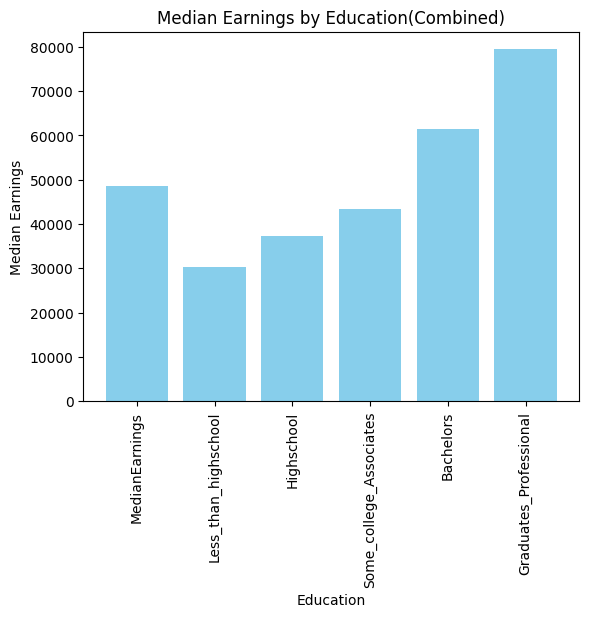

In [ ]:
#Create bar plot to compare national median earnings at different education levels
earnings_avgs=earnings_edu.mean()
y=list(earnings_avgs)
x=list(earnings_avgs.index)
plt.bar(x,y,width=.8,color='skyblue')
plt.xticks(rotation=90)
plt.ylabel('Median Earnings')
plt.xlabel('Education')
plt.title('Median Earnings by Education(Combined)')
plt.show()

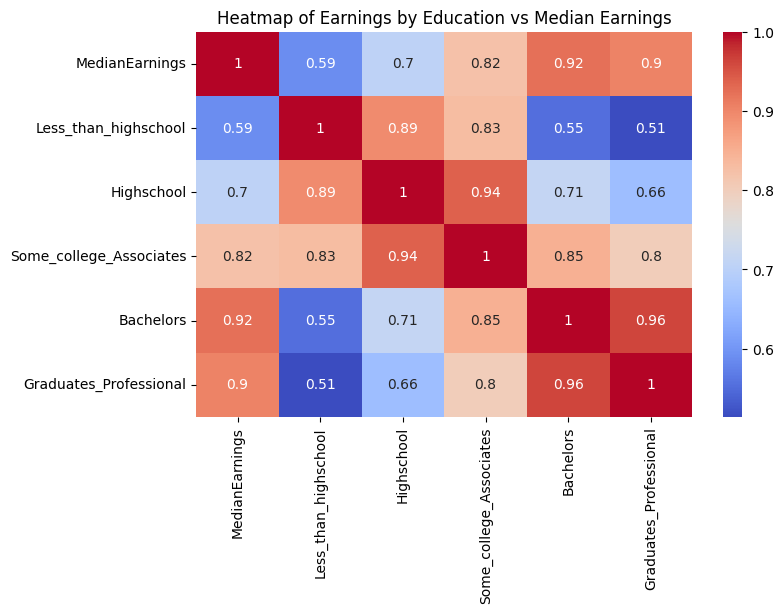

In [ ]:
# Create a heatmap to assess relationships between earnings at different levels of education
plt.figure(figsize=(8, 5))
sns.heatmap(earnings_edu.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Earnings by Education vs Median Earnings')
plt.show()

R= 0.9238465231393022


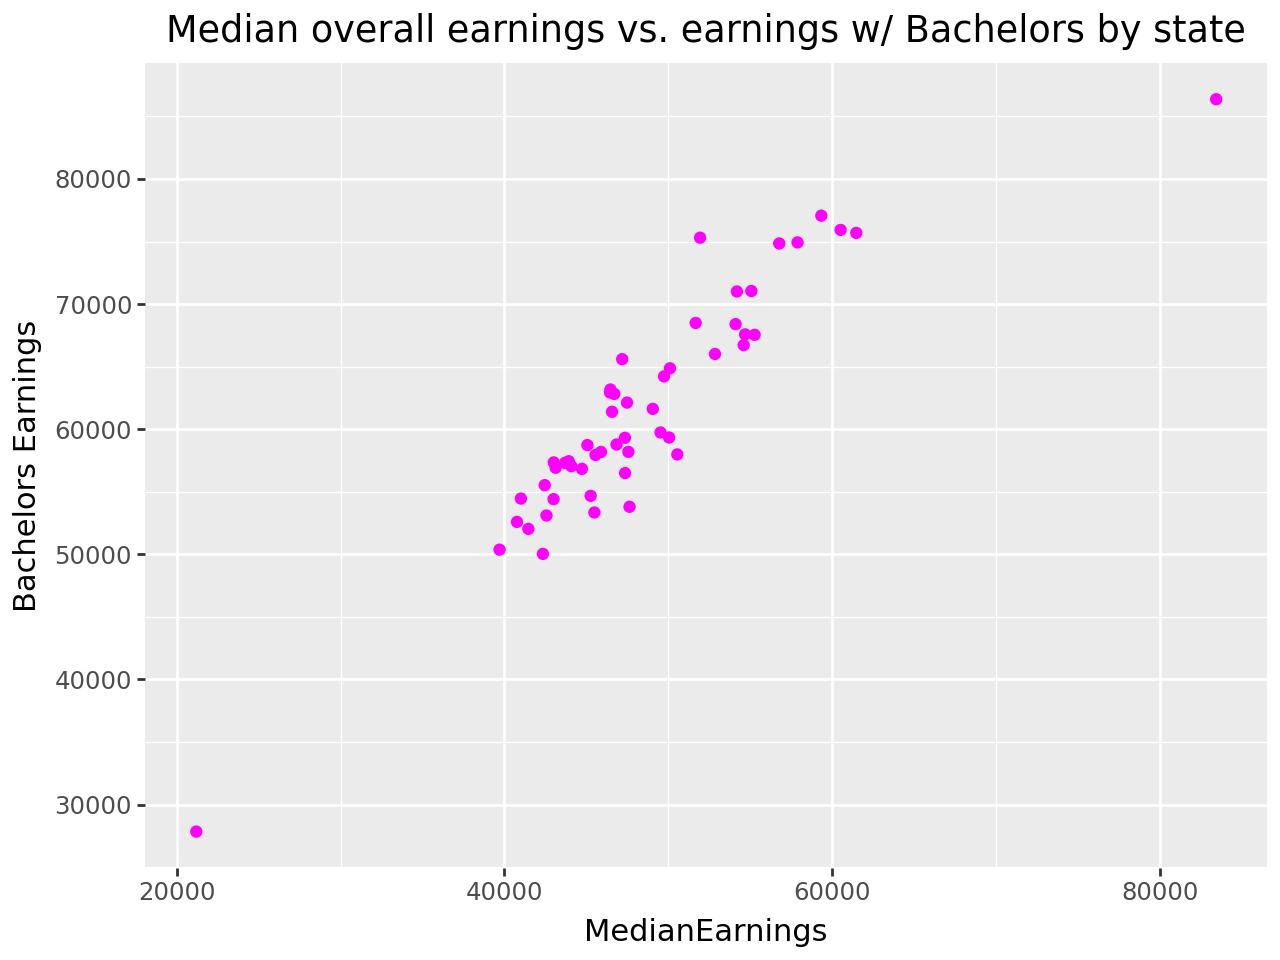

In [ ]:
r_2 = earnings_edu['MedianEarnings'].corr(earnings_edu['Bachelors'])
print('R=',r_2)
#Visualize relationship between Bachelors earnings and overall earnings by state with scatterplot
ggplot(earnings_edu,aes(x='MedianEarnings',y='Bachelors'))+geom_point(color='magenta')+labs(title='Median overall earnings vs. earnings w/ Bachelors by state',y='Bachelors Earnings')

### **Combined(Institution-Level)**

In [ ]:
earnings_edu.reset_index(inplace=True)

In [28]:
#Reformat earnings dataframe to prepare for merge
earnings_edu=earnings_edu.rename(columns={'State':'state'})
earnings_edu['state']=['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI',
'ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE',
'NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX',
'UT','VT','VA','WA','WV','WI','WY','PR']
merged=pd.merge(data,earnings_edu,on='state')
#Calculate new column comparing institution earnings to state Bachelors earnings
merged['earnings_diff']=merged['earnings']-merged['Bachelors']
merged=merged.dropna()
merged[['name','state','earnings','Bachelors','earnings_diff']].sort_values(by='earnings_diff',ascending=False)

,name,state,earnings,Bachelors,earnings_diff
413,University of Health Sciences and Pharmacy in ...,MO,139346.0,57944,81402.0
41,Harvey Mudd College,CA,117259.0,75306,41953.0
652,Carnegie Mellon University,PA,105185.0,64219,40966.0
676,University of Pennsylvania,PA,100577.0,64219,36358.0
895,Stanford University,CA,109840.0,75306,34534.0
...,...,...,...,...,...
898,Soka University of America,CA,38602.0,75306,-36704.0
300,St. John's College,MD,37249.0,75924,-38675.0
842,The Evergreen State College,WA,35669.0,74844,-39175.0
909,John Paul the Great Catholic University,CA,34240.0,75306,-41066.0


In [29]:
#Identify correlations between variables and earnings difference
numeric_vars2 = merged[['earnings_diff','earnings','average_act','graduation_rate','student_pop','acceptance_rate','yearly_cost','average_income']]
correlations2 = numeric_vars2.corr()
correlations2.loc['earnings_diff'].sort_values(ascending=False)

,earnings_diff
earnings_diff,1.000000
earnings,0.834622
average_act,0.425048
graduation_rate,0.408408
average_income,0.321494
yearly_cost,0.245225
student_pop,0.204584
acceptance_rate,-0.325741


In [25]:
#Calculate new column comparing post-graduation earnings to cost of attendance by institution (return on investment)
data['ROI_diff']=data['earnings']-data['yearly_cost']
filtered_data=data[['name','earnings','state','yearly_cost','ROI_diff']]
filtered_data=filtered_data.dropna()
filtered_data.sort_values(by='ROI_diff',ascending=False)

,name,earnings,state,yearly_cost,ROI_diff
1027,United States Merchant Marine Academy,97773.0,NY,9380.0,88393.0
797,University of Health Sciences and Pharmacy in ...,139346.0,MO,52232.0,87114.0
1017,SUNY Maritime College,91351.0,NY,28019.0,63332.0
288,Georgia Institute of Technology-Main Campus,91543.0,GA,29148.0,62395.0
787,Missouri University of Science and Technology,80790.0,MO,24736.0,56054.0
...,...,...,...,...,...
1030,Vassar College,49885.0,NY,80784.0,-30899.0
1135,Kenyon College,44382.0,OH,80270.0,-35888.0
1032,School of Visual Arts,35939.0,NY,72488.0,-36549.0
986,Sarah Lawrence College,38798.0,NY,76703.0,-37905.0


In [27]:
#Identify correlations between return on investment and other variables
numeric = data.select_dtypes(include=['float64','int64']).drop(['region','id','debt','precent_female','percent_loans','pell_grant'],axis=1)
correlations = numeric.corr()
correlations.loc['ROI_diff'].sort_values(ascending=False)

,ROI_diff
ROI_diff,1.000000
stud_fac_ratio,0.504205
part_time,0.454715
student_pop,0.411810
earnings,0.270257
acceptance_rate,0.219887
graduation_rate,-0.216312
average_act,-0.229038
average_income,-0.320571
yearly_cost,-0.753877
